<a href="https://colab.research.google.com/github/rushikeshkishorkhankar/rushikeshkhankar/blob/main/Autoencoder_model_for_MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import keras as k

import sklearn

from keras.layers import Input, Dense

from keras.models import Model

from keras.datasets import fashion_mnist

import numpy as np

import matplotlib.pyplot as plt


In [2]:
# this is the size of our encoded represesntations
encoding_dim = 32 #32 floats ----> compression of factor 24.5, assuming the input is 784 floats

#this is our input place holder
input_img = Input(shape=(784,))

#"encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

#"decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

#this model maps an input to its reconstruction 
autoencoder = Model(input_img, decoded)

In [3]:
#this model maps an input to its encoded representation 
encoder = Model(input_img, encoded)

In [4]:
#create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

#retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

#create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [6]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

In [7]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train,x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 5s 19ms/step - loss: 0.6957 - val_loss: 0.6956
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6955 - val_loss: 0.6954
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 5/50
235/235 [==============================] - 3s 15ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6938 - val_lo

In [9]:
#encode and decode some digits 
#note that we take them from the test set

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

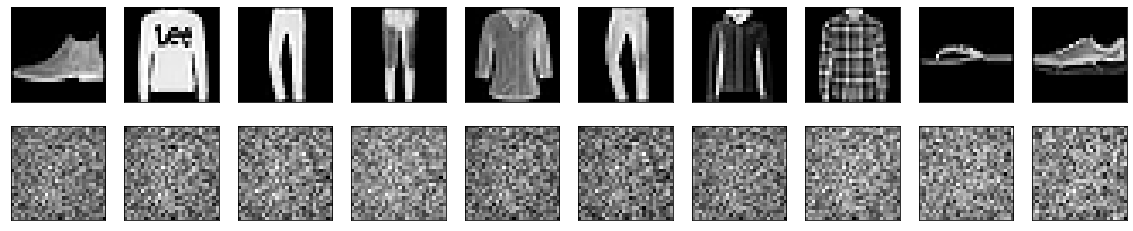

In [10]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()